<a href="https://colab.research.google.com/github/everval/AQM2021/blob/main/Lecture3_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confidence Intervals and Hypothesis Tests 

## Our Simpsons example

It is perhaps time to make a summary of what we have done in the last lectures. 

We do so by analyzing the steps that we have taken towards answering the question: is the Simpsons a good show?*

First, as usual, we load the Python packages for analysis.

In [ ]:
import numpy as np #Package for numerical multidimensional tables
import pandas as pd #Package for data frames
import matplotlib.pyplot as plt #Package for plots and graphs
import random as rnd #Package for random number generation
from scipy.stats import norm #Import the Normal distribution from the scipy.stats package

We collected data on Simpsons and decided to make a histogram to see the ratings.

Saving Simpsons_ratings.csv to Simpsons_ratings.csv
     Season  Episode                                Title  Year  Votes  Rating
0         1        1    Simpsons Roasting on an Open Fire  1989   6681     8.2
1         1        2                      Bart the Genius  1990   4358     7.7
2         1        3                      Homer's Odyssey  1990   3828     7.4
3         1        4        There's No Disgrace Like Home  1990   3785     7.7
4         1        5                     Bart the General  1990   4054     8.0
..      ...      ...                                  ...   ...    ...     ...
700      32       18                         Burger Kings  2021    323     6.9
701      32       19  Panic on the Streets of Springfield  2021    425     6.2
702      32       20             Mother and Child Reunion  2021    291     7.2
703      32       21            The Man from G.R.A.M.P.A.  2021    253     6.5
704      32       22                  The Last Barfighter  2021    301     7.7


Text(0.5, 1.0, 'Simpsons Ratings')

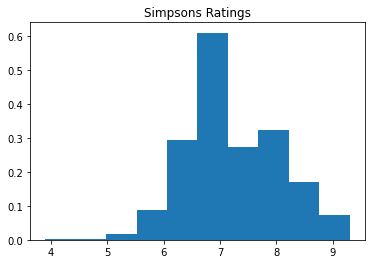

In [ ]:
from google.colab import files
uploaded = files.upload()

simpsons = pd.read_csv('Simpsons_ratings.csv') #Load the data
print(simpsons)
plt.hist(simpsons['Rating'], bins=10, density=True) #Creating the histogram of the random sample
                                        #We make the option density true so the bins sum to 1
plt.title('Simpsons Ratings')

The histogram is an empirical distribution of the data. 

As noted before, there seems to be several episodes with $rating\geq 7$, which could be though about as representing a good show. 

Nonetheless, it can be hard to make a decision based on a graph. Particularly because we could change attibutes like the bin and obtain different results.

Hence, we decided to compute an *overall* rating for the show. The most common measure to grade a show is the average or sample mean, which we compute in Python.

Moreover, we compute the standard deviation to get a sense of the *dispersion* of the ratings.

In [ ]:
mean_simpsons = np.mean(simpsons['Rating'])  #Compute the sample mean
std_simpsons = np.std(simpsons['Rating'])  #Compute the sample standard deviation

display([mean_simpsons,std_simpsons])

[7.197446808510636, 0.8418448200656555]

However, we noticed that the sample mean that we just computed is indeed one of *many* that could be considered. 

Different results are obtained depending on the sample that we select.


In [ ]:
this_sample = simpsons['Rating'].sample(n=200,replace=True)  #Generate a "new" subsample
display(this_sample)   

mean_sample = np.mean(this_sample)   #Computing the mean and standard deviation for this new sample
std_sample = np.std(this_sample)
display([mean_sample,std_sample])

564    6.2
549    7.9
522    6.9
260    7.2
688    6.8
      ... 
427    6.5
9      7.4
186    7.6
177    7.9
62     7.8
Name: Rating, Length: 200, dtype: float64

[7.139500000000003, 0.7787745180731068]

Luckily, the Central Limit Theorem (CLT) allows us to find the distribution of the sample mean. 

The CLT tells us that as the sample size increases $(n\to\infty)$, regardless of the distribution of the data, the sample mean follows a Normal distribution given by 
$$\bar{X}\sim N(\mu,\frac{\sigma}{\sqrt{n}}),$$
where $\mu$ and $\sigma$ are the (true/theoretical) mean and standard deviation of the data. 

The problem then changes to finding the mean and standard deviation of the data, and here is where the Law of Large Numbers (LLN) comes to the rescue.  

The LLN states that, as the sample size increases $(n\to\infty)$, the sample mean approximates the true/theoretical mean; that is,
$$\bar{X}\approx\mu.$$

A similar argument can be made for the standard deviation.

Hence, we have got all the elements to write the distribution of the sample mean.

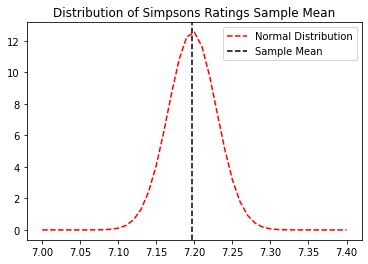

In [ ]:
vals = np.arange(7,7.4,0.01)  #Making a grid for the 'x' axis

mean_sample_mean = mean_simpsons  #Computing the mean of the CLTs distribution
std_sample_mean = std_simpsons/np.sqrt(705)  #Computing the standard deviatoin of the CLTs distribution

nor_vals = norm.pdf(vals,loc=mean_sample_mean,scale=std_sample_mean) #Evaluating the Normal
plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density of the sample mean
plt.title('Distribution of Simpsons Ratings Sample Mean')
plt.axvline(mean_simpsons,color="black",linestyle="--")    #Adding vertical line at the mean
plt.legend(["Normal Distribution", "Sample Mean"], loc="upper right")  #Adding a legend
plt.show()

Knowing the distribution allows us to compute the *probability* that the sample mean takes a higher (lower) value. 

For example, we can evaluate the probability that the sample mean of the Simpsons ratings is 7 or greater; that is
$$Pr(\bar{X}\geq 7) = 1 - Pr(\bar{X}< 7)$$


In [ ]:
1-norm.cdf(7.0,loc=mean_simpsons,scale=std_sample_mean)  #Evaluation the probability that
                                      # the sample mean is greater or equal to 7

0.9999999997630077

Which indicates that we are more than likely to compute a sample mean greater than 7 (almost) regardless of the sample that we consider. 

The idea is that we could use this information to decide if the Simpsons are a good show or not.

Additionally, we may be interested in testing if the Simpsons is a better show than Family Guy by comparing their sample means.

# Confidence Intervals

A confidence interval is another type of estimate but, instead of being just one number, it is an interval of numbers.

We construct a confidence interval by using the distribution of the parameter of interest.

From the Normal distribution, we know that a good mass of the probability is around the mean or location parameter. This allows us to construct intervals that contain $Z\%$ of the probability.

In the general formulation, we construct a $(1-\alpha)$ confidence interval by finding $Z_\alpha$ such that
$$[\mu-Z_\alpha\sigma,\mu+Z_\alpha\sigma],$$
contains $(1-\alpha)$ of the probability.

We saw last time that 
$$[\mu-2\sigma,\mu+2\sigma],$$
contains approximately 0.95 of the probability. Which tells us that $Z_{0.05}\approx 2$. In fact, $Z_{0.05}=1.96$. 

It is more common to write the confidence interval as
$$\mu \pm Z_\alpha \sigma = \mu \pm 1.96 \sigma.$$

We can use a similar derivation for whatever percentage we want to obtain.*italicized text*

## Known Standard Deviation

In cases where we know the standard deviation, the confidence interval can be computed just as above using the Normal distribution to find $Z_\alpha$. 

An example using the binomial distribution.

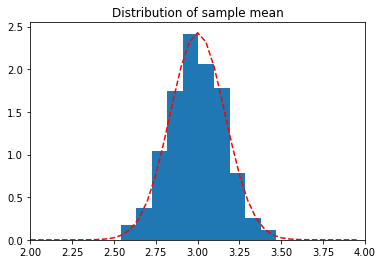

In [ ]:
from scipy.stats import binom  #Importing the binomial distribution
xbars = []   #New list to save the sample means
N = 100     #Size of the sample
n = 1000    #Number of samples

for i in range(0,n):     
  this_sample = binom.rvs(30,0.1,size=N)  #Generate a new B(30,0.1) sample of size N
  xbars.append(np.mean(this_sample))  #Compute the mean for this sample

plt.hist(xbars,bins=10,density=True)   #Plot the histogram
plt.title('Distribution of sample mean')

mu = 30*0.1         #True/theoretical mean
sig = np.sqrt(30*0.1*0.9)  #True/theoretical standard deviation

mean_xbars = mu  #CLT: The theoretical mean (that we know in this case)
std_xbars = sig/np.sqrt(N) #CLT: The theoretical standard deviation (that we know), divided by square of sample size

vals = np.arange(mean_xbars-1,mean_xbars+1,0.05)  #Making a new grid
nor_vals = norm.pdf(vals,loc=mean_xbars,scale=std_xbars) #Evaluating the Normal

plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density
plt.xlim(mean_xbars-1,mean_xbars+1)
plt.show()

The binomial follows a $N(3,\frac{2.7}{\sqrt{100}})$, hence a $\alpha\%$ confidence interval is given by 
$[3-Z_\alpha*\frac{2.7}{\sqrt{100}},3+Z_\alpha*\frac{2.7}{\sqrt{100}}],$
where $Z_\alpha$, or **critical value** comes from the Normal distribution.

Hence, a 90% confidence interval is given by
$[3-1.64*\frac{2.7}{\sqrt{100}},3+1.64*\frac{2.7}{\sqrt{100}}].$

[2.730520501707458, 3.269479498292542]

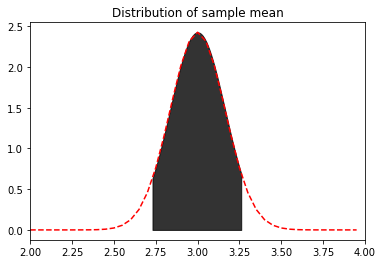

0.8989948330517927

In [ ]:
lim_inf = mean_xbars-1.64*std_xbars  #Confidence Invertals lim inf
lim_sup = mean_xbars+1.64*std_xbars

display([lim_inf, lim_sup])

con_int = np.arange(lim_inf,lim_sup,0.01)   #Generate grid for the CI

plt.title('Distribution of sample mean')
plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density
plt.xlim(mean_xbars-1,mean_xbars+1)
plt.fill_between(con_int,norm.pdf(con_int,loc=mean_xbars,scale=std_xbars),alpha=0.8,color="black")  #Paint the area
plt.show()

display(norm.cdf(lim_sup,loc=mean_xbars,scale=std_xbars)-norm.cdf(lim_inf,loc=mean_xbars,scale=std_xbars))  #Compute the area inside the CI

We can compute the proportion of sample means generated above that fall inside the confidence interval.

In [ ]:
count = 0   #Start the count at zero
for ii in range(0,n):
  count = count+1*((xbars[ii]>lim_inf) & (xbars[ii]<lim_sup)) #Add one to the count if 
                                      #the sample mean is inside the confidence interval

prop_inside = count/n     #Proportion inside the CI
display(prop_inside)

0.892

## Unknown Standard Deviation

In the general case, when we do not know the true/theoretical standard deviation, we have to estimate it from the data.

Our estimate for the sample variance is given by
$$s^2 = \frac{1}{n}[(x_1-\bar{x})^2+(x_2-\bar{x})^2+\cdots+(x_n-\bar{x})^2],$$
from where we estimate the standard deviation by $s$.

Above, the LLN tells us that our estimate of the sample mean gets closer and close to the true/theoretical mean, as the sample size increases. 

Moreover, the CLT tells us that it follows a Normal distribution.

### Chi-squared distribution

Notice that we are then taking squares of (approximately) Normal variables, which takes us to another commonly used distributions: the chi-squared distribution, denoted by $\chi^2$.

Formally, the chi-square distribution is defined as
> Let $Y_1,Y_2,\cdots,Y_n\sim N(0,1)$, then $Z=(Y_1^2+Y_2+\cdots+Y_n^2)$ follows a chi-square distribution with $n$ degrees of freedom, denoted as $Z^\sim \chi^2_n$,.

We can see this in Python. 

To generate a sample from a chi-squared distribution with one degree of freedom, we generate values from the Normal distribution and square them. We then compare the histogram from our generated sample against the theoretical pdf of the chi-squared distribution.

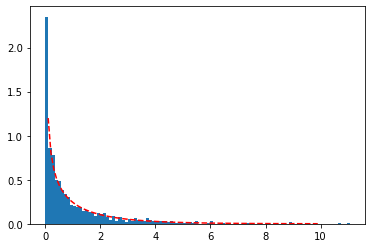

In [ ]:
from scipy.stats import chi2  #Importing the chi-square distribution

N = 1000 #Size of the sample

Y = norm.rvs(size=N,loc=0,scale=1)  #Generating a sample from the Normal
W = Y**2  #Taking squares

plt.hist(W,bins=100,density=True)  #Plotting the histogram


vals = np.arange(0,10,0.1)  #Notice that the chi-square takes non-negative values
chi_vals = chi2.pdf(vals,df=1)  #Evaluationg the chi2 distribution
plt.plot(vals,chi_vals,color="red",linestyle="--") #Adding the theoretical density

Which shows that our sample corresponds to the chi-squared distribution with one degree of freedom.

We plot several chi-squares distribution with different degrees of freedom to see the effect that it has on the shape.

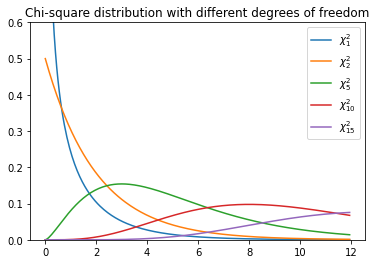

In [ ]:
new_vals = list(np.arange(0,12,0.05))  #New grid
vals_dfs = [1, 2, 5, 10, 15]    #Different degrees of freedom

for i in range(0,5):
    plt.plot(new_vals,chi2.pdf(new_vals,df=vals_dfs[i])) #A plot for each degrees of freedom value
plt.title("Chi-square distribution with different degrees of freedom")
plt.ylim(0,0.6) #Shortening the y axis
plt.legend(["$\chi^2_1$","$\chi^2_2$","$\chi^2_5$","$\chi^2_{10}$","$\chi^2_{15}$"])  #Adding legends to identify each curve
plt.show()

### Student's t distribution

Circling back to the confidence interval when we do not know the true/theoretical standard deviation. Consider the variable given by
$$t = \frac{(\bar{X}-\mu)/(\sigma/\sqrt(n))}{(s/\sqrt(n))/(\sigma/\sqrt(n))},$$
where $s$ is the estimate of the standard deviation.

Turns out $t$ defined like this follows the final commonly used distribution for statistical tests, the *Student's t distribution*.

Formally, the t distribution is defined as


>  Let $X\sim N(0,1)$ and $Y\sim\chi^2_n$ then $Z=\frac{X}{\sqrt{Y/n}}$ follows a t distribution with $n$ degrees of freedom, denoted as $Z^\sim t_n$.

Wrapping up, our statistic, when we do not know the standard deviation and we need to esimate it, formally follows a t distribution. 

Hence, formally we should use the t distribution to compute $Z_\alpha$ to construct the confidence interval.

Once again, we can use Python to plot the t distribution.

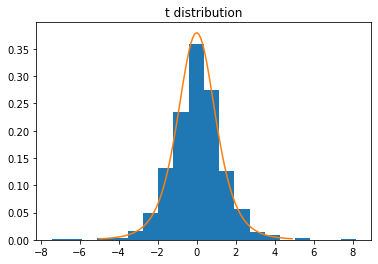

In [ ]:
from scipy.stats import t  #Importing the t distribution

N = 1000 #Size of the sample
deg_free = 5  #Degrees of freedom

X = norm.rvs(size=N)  #Generating a sample from the Normal
Y = chi2.rvs(size=N,df=deg_free)  #Generating a sample from the chi2

Z = X/np.sqrt(Y/deg_free)  #Generating the t distribution

plt.hist(Z,bins=20,density=True)  #Plotting the histogram

vals = np.arange(-5,5,0.1)   #New grid
plt.plot(vals,t.pdf(vals,df=deg_free))  #Plot evaluating the t distribution directly
plt.title("t distribution")
plt.show()

Properties of the t distribution:
*   Bell-shape
*   Symmetrical
*   Unimodal
*   Mean is the same as the mode and the median
*   More weight in the tails than the Normal
*   Gets close to the Normal as the degrees of freedom increase
